In [1]:
project_root_path = '/home/bob/projects/Web3HackerNetwork'

In [2]:
import sys

bob_lib_path = project_root_path + "/sandbox/python/bob/"
sys.path.append(bob_lib_path)
import commit_stat_engineering

In [10]:
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

for stat in all_stats[slice(1)]:
    print(json.dumps(stat, indent=2))

{
  "commit": "fb528905fb6448e2b502f7de8fba877a2a995f6d",
  "totalFiles": 2,
  "binFiles": 0,
  "textFiles": 2,
  "binBytes": 0,
  "textLines": 26,
  "totalBytes": 780,
  "pctBinBytes": 0,
  "pctTextBytes": 100.0,
  "jsFiles": 2,
  "jsLines": 26,
  "pctJsFiles": 100.0,
  "pctJsLines": 100.0,
  "pctJsBytes": 100.0,
  "rustFiles": 0,
  "rustLines": 0,
  "pctRustFiles": 0,
  "pctRustLines": 0,
  "pctRustBytes": 0,
  "markdownFiles": 0,
  "markdownLines": 0,
  "pctMarkdownFiles": 0,
  "pctMarkdownLines": 0,
  "pctMarkdownBytes": 0,
  "jsonFiles": 0,
  "jsonLines": 0,
  "pctJsonFiles": 0,
  "pctJsonLines": 0,
  "pctJsonBytes": 0
}


In [8]:
#for stat in [stat for stat in all_commit_stats if stat['rustFiles'] > 0 and stat['markdownFiles'] > 0 and stat['jsonFiles'] > 0 and stat['jsFiles'] > 0]:
#    print(json.dumps(stat, indent=2))

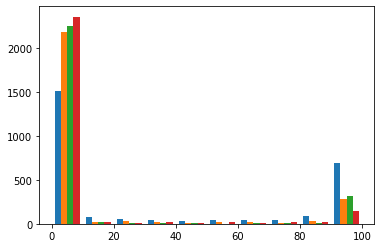

In [11]:
import matplotlib.pyplot as plt
import numpy as np

pct_rust_array = [stats['pctRustBytes'] for stats in all_stats]
pct_js_array = [stats['pctJsBytes'] for stats in all_stats]
pct_markdown_array = [stats['pctMarkdownBytes'] for stats in all_stats]
pct_json_array = [stats['pctJsonBytes'] for stats in all_stats]

plt.hist([np.array(pct_rust_array),
          np.array(pct_js_array),
          np.array(pct_markdown_array),
          np.array(pct_json_array)], 10)
plt.show()


### finding bulk commits
scatter plot of various against totalBytes

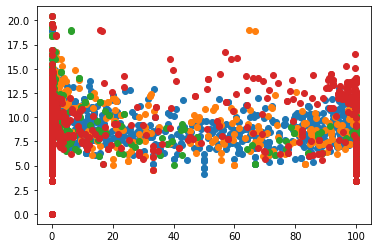

In [17]:
import matplotlib.pyplot as plt
import numpy as np

total_bytes_array = [np.log1p(stats['totalBytes']) for stats in all_stats]
plt.scatter(pct_rust_array, total_bytes_array)
plt.scatter(pct_js_array, total_bytes_array)
plt.scatter(pct_markdown_array, total_bytes_array)
plt.scatter(pct_json_array, total_bytes_array)
plt.show()

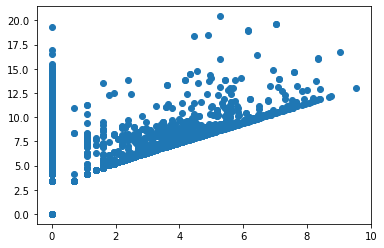

In [20]:
rust_array = [np.log1p(stats['rustLines']) for stats in all_stats]
js_array = [np.log1p(stats['jsLines']) for stats in all_stats]
markdown_array = [np.log1p(stats['markdownLines']) for stats in all_stats]
json_array = [np.log1p(stats['jsonLines']) for stats in all_stats]

plt.scatter(rust_array, total_bytes_array)
#plt.scatter(js_array, total_bytes_array)
#plt.scatter(markdown_array, total_bytes_array)
#plt.scatter(json_array, total_bytes_array)
plt.show()

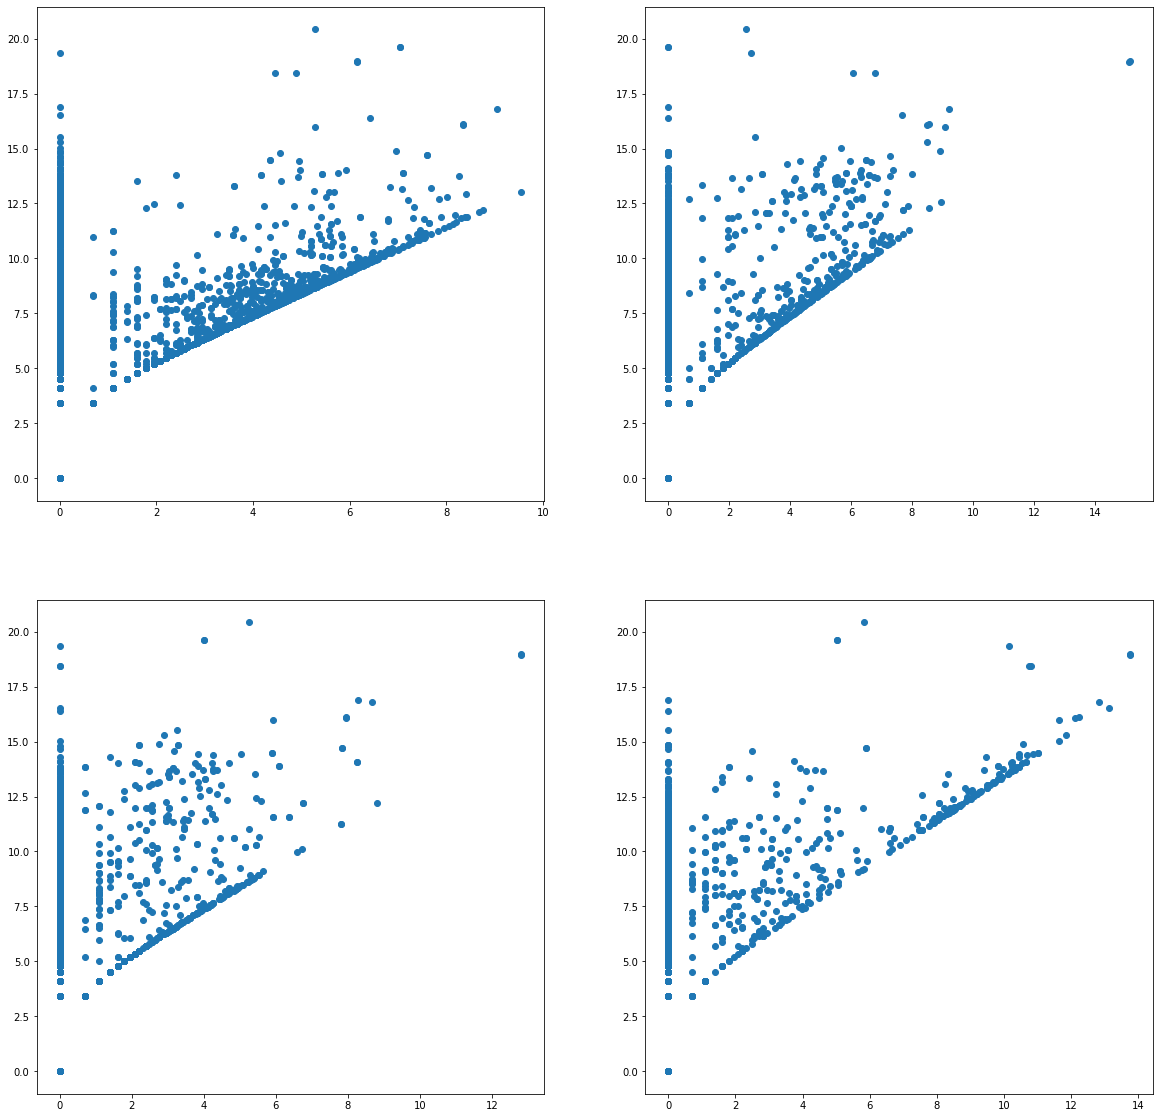

In [37]:
rust_array = [np.log1p(stats['rustLines']) for stats in all_stats]
js_array = [np.log1p(stats['jsLines']) for stats in all_stats]
markdown_array = [np.log1p(stats['markdownLines']) for stats in all_stats]
json_array = [np.log1p(stats['jsonLines']) for stats in all_stats]

fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0,0].scatter(rust_array, total_bytes_array)
axs[0,1].scatter(js_array, total_bytes_array)
axs[1,0].scatter(markdown_array, total_bytes_array)
axs[1,1].scatter(json_array, total_bytes_array)
plt.show()